# Coronavirus Basic Data Analysis-China

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rc, rcParams
from plotFunction import casePlot

Dataset: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

# Read Data

In [2]:
# reading data from the csv file
df= pd.read_csv("2019_nCoV_data.csv")
# data clean
df.drop(["Sno","Last Update"], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].apply(lambda x:x.date())
df.loc[df['Country']=='Mainland China','Country']='China'
df.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,1.0,0.0,0.0
1,2020-01-22,Beijing,China,14.0,0.0,0.0
2,2020-01-22,Chongqing,China,6.0,0.0,0.0
3,2020-01-22,Fujian,China,1.0,0.0,0.0
4,2020-01-22,Gansu,China,0.0,0.0,0.0


In [3]:
df.tail()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
1714,2020-02-17,"Madison, WI",US,1.0,0.0,0.0
1715,2020-02-17,"Orange, CA",US,1.0,0.0,0.0
1716,2020-02-17,"San Antonio, TX",US,1.0,0.0,0.0
1717,2020-02-17,"Seattle, WA",US,1.0,0.0,1.0
1718,2020-02-17,"Tempe, AZ",US,1.0,0.0,0.0


# Data Preprocessing

In [4]:
df_China = df[df['Country']=='China']
df_China.drop('Country', axis=1, inplace=True)
df_China_stat = df_China.groupby(['Date']).sum().reset_index(drop=None)
df_China_stat['Daily_confirmed_cases'] = df_China_stat.Confirmed.diff()
df_China_stat['Daily_deaths'] = df_China_stat.Deaths.diff()
df_China_stat['Daily_recovered'] = df_China_stat.Recovered.diff()
df_China_stat['Deaths_rate'] = df_China_stat.apply(lambda x: x['Deaths']*100/x['Confirmed'], axis=1)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Plot graphs

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


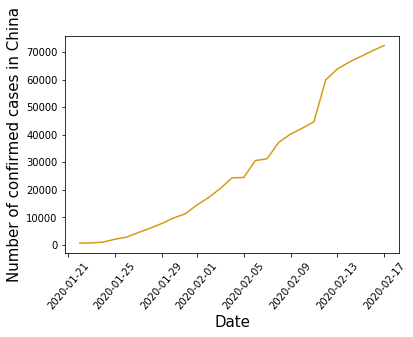

In [5]:
plt.plot('Date', 'Confirmed', data=df_China_stat, color='#D79913')
plt.xticks(rotation=50)
plt.ylabel('Number of confirmed cases in China', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

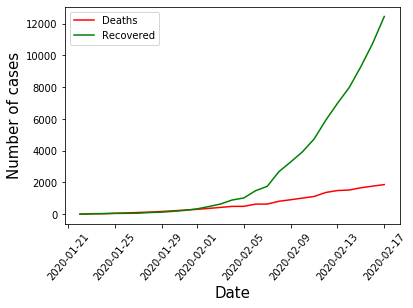

In [6]:
plt.plot('Date','Deaths',data=df_China_stat, color='red')
plt.plot('Date','Recovered',data=df_China_stat, color='green')
plt.xticks(rotation=50)
plt.ylabel('Number of cases', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.legend()
plt.show()

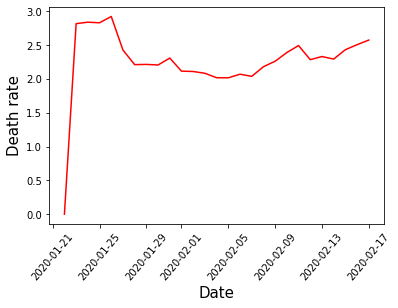

In [7]:
plt.plot('Date','Deaths_rate',data=df_China_stat, color='red')
plt.xticks(rotation=50)
plt.ylabel('Death rate', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.show()

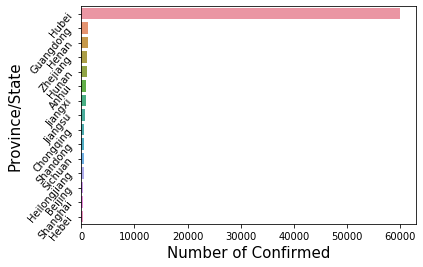

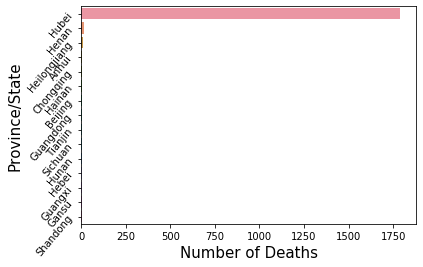

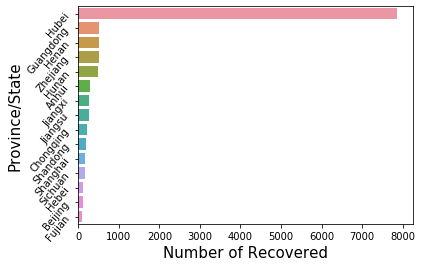

In [8]:
# include Hubei
casePlot(df_China,'Province/State','Confirmed')
casePlot(df_China,'Province/State','Deaths')
casePlot(df_China,'Province/State','Recovered')

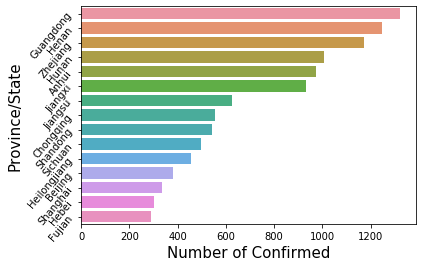

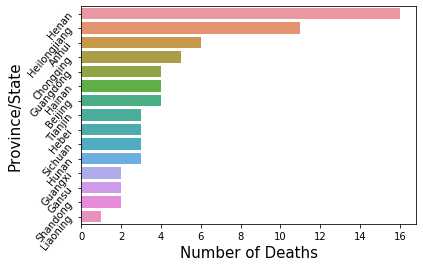

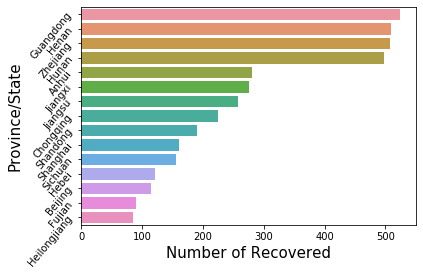

In [9]:
# exclude Hubei
df_China2 = df_China[df_China['Province/State'] != 'Hubei']
casePlot(df_China2,'Province/State','Confirmed')
casePlot(df_China2,'Province/State','Deaths')
casePlot(df_China2,'Province/State','Recovered')